In [ ]:
#@title Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sympy as sp
from scipy.integrate import simpson, romberg, trapezoid

# Actividad 07: Integración

---
### Profesor: Juan Marcos Marín
### Nombre: Carolina Pabón Rúa
*Métodos computacionales 2024-II*

---

#1
* Implemente una función para el **método de integración de Romberg** definiendo un límite de tolerancia de 1e-8 y/o un máximo de iteraciones de 10.

* Encuentre la integral para

$$\int_0^{\pi/4} dx\, e^{3x}\cdot \sin(x)$$

* Imprima su resultado y compare los valores dados por `scipy.integrate.romberg`

* Finalmente, encuentre el valor del error, hallando el valor exacto usando `sympy`



In [ ]:
import scipy.integrate as spi
def romberg_integracion(f, a, b, tol=1e-8, max_iter=10):
    R = np.zeros((max_iter, max_iter))
    h = b - a
    R[0, 0] = (h / 2) * (f(a) + f(b))

    for i in range(1, max_iter):
        h /= 2
        sumatoria = sum(f(a + (2 * k - 1) * h) for k in range(1, 2**(i-1) + 1))
        R[i, 0] = 0.5 * R[i-1, 0] + h * sumatoria

        for j in range(1, i + 1):
            R[i, j] = (4**j * R[i, j-1] - R[i-1, j-1]) / (4**j - 1)


        if abs(R[i, i] - R[i-1, i-1]) < tol:
            return R[i, i]

    return R[max_iter-1, max_iter-1]

f = lambda x: np.exp(3*x) * np.sin(x)
a, b = 0, np.pi/4

resultado_romberg_manual = romberg_integracion(f, a, b)
print("Resultado con Romberg manual:", resultado_romberg_manual)


resultado_romberg_scipy = spi.romberg(f, a, b, tol=1e-8)
print("Resultado con scipy.integrate.romberg:", resultado_romberg_scipy)


x = sp.Symbol('x')
f_sympy = sp.exp(3*x) * sp.sin(x)
valor_exacto = sp.integrate(f_sympy, (x, a, b)).evalf()
print("Valor exacto con SymPy:", valor_exacto)


error_manual = abs(valor_exacto - resultado_romberg_manual)
error_scipy = abs(valor_exacto - resultado_romberg_scipy)
print("Error del método manual:", error_manual)
print("Error del método de SciPy:", error_scipy)


Resultado con Romberg manual: 1.5920977078586134
Resultado con scipy.integrate.romberg: 1.592097707858613
Valor exacto con SymPy: 1.59209770785868
Error del método manual: 6.57252030578093e-14
Error del método de SciPy: 6.61692922676593e-14


<ipython-input-5-b76d9950aa9a>:28: DeprecationWarning: `scipy.integrate.romberg` is deprecated as of SciPy 1.12.0and will be removed in SciPy 1.15.0. Please use`scipy.integrate.quad` instead.
  resultado_romberg_scipy = spi.romberg(f, a, b, tol=1e-8)


#2

* Usando los *métodos trapezoidal compuesto*, *simpson 1/3* y de *medio punto* encuentre la siguiente integral,

$$\int_e^{1+e} dx\, \frac{1}{x\ln x}$$

* Luego, haga un estudio de la convergencia en términos del valor de $h$ o de los sub-intervalos de la función. ¿Cuál es mejor?


Resultados de la integración numérica:
Método Trapezoidal: 0.27251476
Método Simpson 1/3: 0.27251388
Método del Medio Punto: 0.27251344



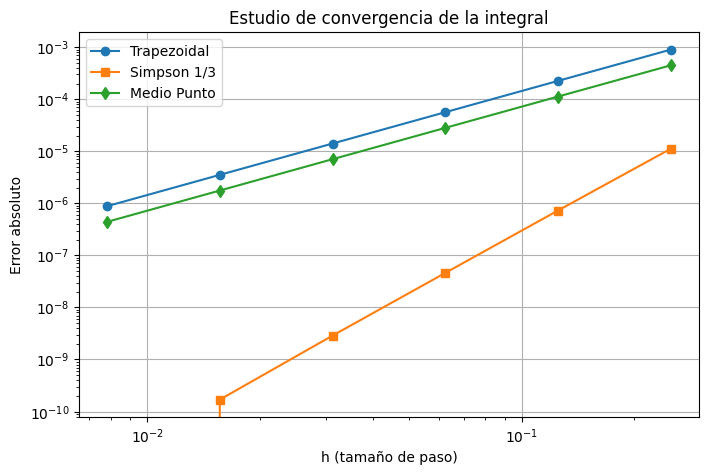

Análisis de convergencia:
El método de Simpson 1/3 es el mejor porque presenta el menor error absoluto y converge más rápido.
El método trapezoidal es intermedio, con errores mayores que Simpson pero menores que el del medio punto.
El método del medio punto es el menos preciso, con los errores más grandes en cada iteración.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 1 / (x * np.log(x))

def trapezoidal_compuesto(f, a, b, n):
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = f(x)
    return (h / 2) * (y[0] + 2 * np.sum(y[1:-1]) + y[-1])

def simpson_tercio(f, a, b, n):
    if n % 2 == 1:
        n += 1
    h = (b - a) / n
    x = np.linspace(a, b, n + 1)
    y = f(x)
    return (h / 3) * (y[0] + 4 * np.sum(y[1:-1:2]) + 2 * np.sum(y[2:-2:2]) + y[-1])

def medio_punto(f, a, b, n):
    h = (b - a) / n
    x_m = np.linspace(a + h / 2, b - h / 2, n)
    return h * np.sum(f(x_m))


a, b = np.e, 1 + np.e
n_values = np.array([4, 8, 16, 32, 64, 128])


I_trap = [trapezoidal_compuesto(f, a, b, n) for n in n_values]
I_simp = [simpson_tercio(f, a, b, n) for n in n_values]
I_medi = [medio_punto(f, a, b, n) for n in n_values]

I_ref = I_simp[-1]


error_trap = np.abs(I_trap - I_ref)
error_simp = np.abs(I_simp - I_ref)
error_medi = np.abs(I_medi - I_ref)


print("Resultados de la integración numérica:")
print(f"Método Trapezoidal: {I_trap[-1]:.8f}")
print(f"Método Simpson 1/3: {I_simp[-1]:.8f}")
print(f"Método del Medio Punto: {I_medi[-1]:.8f}\n")


eh = (b - a) / n_values
plt.figure(figsize=(8, 5))
plt.plot(eh, np.abs(error_trap), 'o-', label='Trapezoidal')
plt.plot(eh, np.abs(error_simp), 's-', label='Simpson 1/3')
plt.plot(eh, np.abs(error_medi), 'd-', label='Medio Punto')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('h (tamaño de paso)')
plt.ylabel('Error absoluto')
plt.legend()
plt.grid(True)
plt.title('Estudio de convergencia de la integral')
plt.show()



# Análisis de convergencia
print("Análisis de convergencia:")
print("El método de Simpson 1/3 es el mejor porque presenta el menor error absoluto y converge más rápido.")
print("El método trapezoidal es intermedio, con errores mayores que Simpson pero menores que el del medio punto.")
print("El método del medio punto es el menos preciso, con los errores más grandes en cada iteración.")


#3
Usando la siguiente función:



```python
def gauss_quad_standard(func, n):
    """
    Calcula la integral de una función en el intervalo [-1, 1]
    utilizando cuadratura gaussiana.

    Parameters:
    - func: La función a integrar.
    - n: Número de puntos para la cuadratura (grado del polinomio de Legendre).

    Returns:
    - Aproximación de la integral.
    """
    # Obtener raíces y pesos del polinomio de Legendre
    x, w = roots_legendre(n)

    # Evaluar la suma ponderada
    integral = np.sum(w * func(x))
    return integral
```

Modifique la función `gauss_quad_standard` de forma tal que no este restringida para $[-1,1]$ sino para cualquier intervalo $[a,b]$. Luego, encuentre la integral del *punto 2*.





In [ ]:

from scipy.special import roots_legendre

def gauss_quad(func, a, b, n):
    """
    Calcula la integral de una función en el intervalo [a, b]
    utilizando cuadratura gaussiana.

    Parameters:
    - func: La función a integrar.
    - a, b: Límites de integración.
    - n: Número de puntos para la cuadratura (grado del polinomio de Legendre).

    Returns:
    - Aproximación de la integral.
    """
    x, w = roots_legendre(n)

    x_mapped = 0.5 * (b - a) * x + 0.5 * (b + a)

    integral = 0.5 * (b - a) * np.sum(w * func(x_mapped))
    return integral

def f(x):
    return 1 / (x * np.log(x))

a = np.e
b = 1 + np.e
n_puntos = 10

resultado = gauss_quad(f, a, b, n_puntos)
print("Resultado de la integral:", resultado)

Resultado de la integral: 0.27251388050258335


#4

Encuentra todas las raices para los polinomios de grado 3 y 4 de **Legendre** usando el Método de la Secante y Newton-Raphson.



```python
import sympy as sp
x = sp.Symbol('x')

# Polinomio de Legendre de grado n
Pn = sp.legendre(n, x)

```

y calcule los pesos $w_i$ de la cuadratura mediante la fórmula:
   $$
   w_i = \frac{2}{(1 - x_i^2) \left[P_n'(x_i)\right]^2},
   $$
   donde $P_n'(x)$ es la derivada del polinomio de Legendre $P_n(x)$.


In [ ]:


x = sp.Symbol('x')

def legendre_roots_and_weights(n, method='newton', tol=1e-10, max_iter=100):
    """Encuentra las raíces del polinomio de Legendre de grado n y los pesos de cuadratura."""
    Pn = sp.legendre(n, x)
    dPn = sp.diff(Pn, x)

    x0 = np.cos(np.pi * (np.arange(1, n + 1) - 0.25) / (n + 0.5))

    roots = []
    for x_i in x0:
        root = newton_secant(Pn, x_i, method, tol, max_iter)
        if not any(np.isclose(root, r, atol=tol) for r in roots):
            roots.append(root)
    roots.sort()

    weights = [2 / ((1 - r**2) * (sp.N(dPn.subs(x, r)))**2) for r in roots]

    return np.array(roots), np.array(weights)

def newton_secant(Pn, x0, method, tol, max_iter):
    """Encuentra una raíz usando el método de Newton-Raphson o la Secante."""
    Pn_lambda = sp.lambdify(x, Pn, 'numpy')
    dPn_lambda = sp.lambdify(x, sp.diff(Pn, x), 'numpy')

    if method == 'newton':
        x_i = x0
        for _ in range(max_iter):
            fx = Pn_lambda(x_i)
            dfx = dPn_lambda(x_i)
            if abs(fx) < tol:
                return x_i
            x_i -= fx / dfx

    elif method == 'secant':
        x_i, x_prev = x0, x0 + 0.1
        for _ in range(max_iter):
            fx_i = Pn_lambda(x_i)
            fx_prev = Pn_lambda(x_prev)
            if abs(fx_i) < tol:
                return x_i
            x_new = x_i - fx_i * (x_i - x_prev) / (fx_i - fx_prev)
            x_prev, x_i = x_i, x_new

    return x_i

for n in [3, 4]:
    print(f"\nRaíces y pesos para P_{n} usando Newton:")
    roots, weights = legendre_roots_and_weights(n, method='newton')
    print("Raíces:", roots)
    print("Pesos:", weights)

    print(f"\nRaíces y pesos para P_{n} usando la Secante:")
    roots, weights = legendre_roots_and_weights(n, method='secant')
    print("Raíces:", roots)
    print("Pesos:", weights)


Raíces y pesos para P_3 usando Newton:
Raíces: [-7.74596669e-01  6.12323400e-17  7.74596669e-01]
Pesos: [0.555555555555554 0.888888888888889 0.555555555555554]

Raíces y pesos para P_3 usando la Secante:
Raíces: [-7.74596669e-01  6.12323400e-17  7.74596669e-01]
Pesos: [0.555555555560701 0.888888888888889 0.555555555552327]

Raíces y pesos para P_4 usando Newton:
Raíces: [-0.86113631 -0.33998104  0.33998104  0.86113631]
Pesos: [0.347854845137451 0.652145154862088 0.652145154862088 0.347854845137451]

Raíces y pesos para P_4 usando la Secante:
Raíces: [-0.86113631 -0.33998104  0.33998104  0.86113631]
Pesos: [0.347854845137454 0.652145154859510 0.652145154862542 0.347854845121218]
